<a href="https://colab.research.google.com/github/lugsantistebanji/WCS-IA/blob/main/WCS_IA_Quetes_ML_R%C3%A9gression_lin%C3%A9aire_simple_(univari%C3%A9e).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exécutez le code ci-dessous

In [7]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
link = "https://raw.githubusercontent.com/murpi/wilddata/master/quests/weather2019.csv"
df_weather = pd.read_csv(link)
df_weather = df_weather.iloc[:,[0,1,2, -4]]

In [8]:
df_weather

,DATE,MAX_TEMPERATURE_C,MIN_TEMPERATURE_C,SUNHOUR
0,2019-01-01,9,4,5.1
1,2019-01-02,8,5,8.7
2,2019-01-03,6,0,8.7
3,2019-01-04,5,-1,5.1
4,2019-01-05,6,-1,8.7
...,...,...,...,...
360,2019-12-27,13,10,8.7
361,2019-12-28,11,5,6.9
362,2019-12-29,9,2,8.7
363,2019-12-30,12,4,8.7


# Régression linéaire univariée avec Scikit-Learn

Scikit-Learn est la bibliothèque de Machine Learning la plus puissante pour Python. Vous vous souvenez que vous pouvez effectuer une régression linéaire avec NumPy ? Vous pouvez faire la même chose avec Scikit-Learn, et bien plus encore !

Commençons par une régression linéaire univariée pour apprendre la syntaxe.

## Afficher un regplot avec Seaborn et montrer une régression linéaire entre les heures d'ensoleillement (SUNHOUR) sur l'axe des X et la température maximale (MAX_TEMPERATURE_C) sur l'axe des Y.

<Axes: xlabel='SUNHOUR', ylabel='MAX_TEMPERATURE_C'>

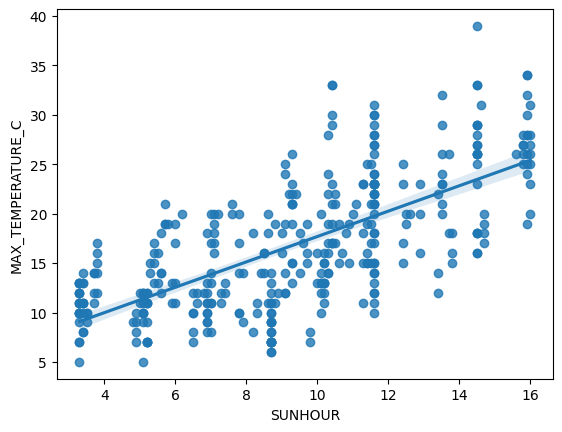

In [9]:
# Ton code ici :
import seaborn as sns

sns.regplot(data=df_weather, x="SUNHOUR", y="MAX_TEMPERATURE_C")

## Entraînons le modèle
Pour cette partie, vous n'avez qu'à lire les commentaires et exécuter le code ci-dessous:

In [11]:
# Scikit-Learn peut trouver les coefficients de la régression linéaire
from sklearn.linear_model import LinearRegression

# Tout d'abord, vous devez définir 2 séries :
# X-axis : la colonne corrélée, ici ce sont les heures d'ensoleillement
X = df_weather[['SUNHOUR']]

# Y-axis : la colonne à prédire, donc ici la température maximale
y = df_weather['MAX_TEMPERATURE_C']

# Pourquoi "X" est en majuscule et "y" en minuscule ? Bonne question, nous verrons cela dans la prochaine quête. Maintenant, utilisez simplement ceci.

# Pour entraîner un modèle de machine learning (ici, il trouvera l'équation de la régression linéaire), il suffit de lancer la méthode ".fit".
modelLR = LinearRegression().fit(X, y)

## Explorons le modèle

In [ ]:
# Votre modèle est entraîné, il possède désormais certains attributs.
# Coefficient : c'est le "a" dans votre équation "aX + b"
print("coefficient :",modelLR.coef_)

# Intercept : c'est le "b" dans votre équation "aX + b"
print("intercept :", modelLR.intercept_)


coefficient : [1.28422116]
interception : 4.8472953557195435


## On va prédire la MAX_TEMPERATURE_C pour une valeur de SUNHOURS = 10

In [15]:
# Vous pouvez "prédire" la température maximale à partir des heures d'ensoleillement
# Par exemple, essayons avec 10 heures d'ensoleillement

# Calcul manuel :
print("By hand :", modelLR.coef_ * 10 + modelLR.intercept_ )

# Avec une fonction de Scikit-Learn :
print("Scikit-Learn :  ", modelLR.predict([[10]])  )

By hand : [17.68950691]
Scikit-Learn :   [17.68950691]


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


## Prédictions pour plusieurs valeurs (une Série)
Prédisez la température maximale pour la colonne Sunhour de votre DataFrame.

Remarque : Vous devrez préciser votre colonne avec une double paire de crochets, comme ceci : `df[['your_column]]`

*Pourquoi ? Nous verrons cela dans la prochaine quête.*

In [12]:
# Trouvez un moyen de stocker le résultat de la prédiction dans une nouvelle colonne 'predict' du DataFrame.
modelLR.predict(df_weather[['SUNHOUR']])

array([11.39682325, 16.02001941, 16.02001941, 11.39682325, 16.02001941,
        9.08522517, 11.39682325,  9.08522517,  9.08522517, 16.02001941,
       11.39682325, 13.70842133,  9.08522517,  9.08522517, 16.02001941,
        9.21364728, 16.02001941, 16.02001941,  9.21364728, 11.52524536,
       16.02001941,  9.21364728, 11.52524536, 11.52524536,  9.21364728,
        9.3420694 , 15.37790883, 13.19473287, 11.0115569 , 13.19473287,
       11.13997902, 11.13997902, 17.43266268, 17.43266268, 11.13997902,
       11.13997902, 11.26840113, 13.32315498, 11.26840113, 13.32315498,
       15.50633095, 15.50633095, 17.81792903, 17.81792903, 17.94635114,
       17.94635114, 15.63475306, 17.94635114, 13.57999921, 11.52524536,
       17.68950691, 18.20319537, 18.20319537, 18.71688384, 15.76317518,
       18.84530595, 18.84530595, 18.97372807, 11.91051171, 17.81792903,
       17.81792903, 12.03893383, 15.89159729, 17.81792903, 12.03893383,
       16.02001941, 17.94635114, 12.42420017, 14.22210979, 17.94

In [20]:
# Votre code ici :
df_weather = df_weather.assign(predict=lambda x: modelLR.predict(x[['SUNHOUR']]))

Maintenant Vous pouvez prédire la température maximale à partir de n'importe quelle valeur des heures d'ensoleillement (SUNHOUR). Votre prédiction est maintenant stockée dans une colonne, et vous pouvez la visualiser.

## Visualisations

À vous maintenant de créer un graphique de dispersion combiné :
- Axe X : Heures d'ensoleillement (SUNHOUR)
- Axe Y : Températures maximales (MAX_TEMPERATURE_C) en points bleus et 'predict' en points rouges.

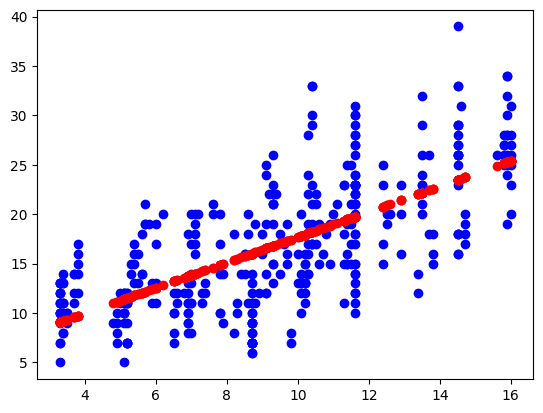

In [21]:
# Votre code ici :
import matplotlib.pyplot as plt

plt.scatter(df_weather['SUNHOUR'], df_weather['MAX_TEMPERATURE_C'], color='blue')
plt.scatter(df_weather['SUNHOUR'], df_weather['predict'], color='red')

Votre prédiction est stockée dans un DataFrame. Ainsi, vous pouvez visualiser vos prédictions sans la colonne "source". Essayons cela.
Créez un graphique de dispersion combiné :
- Axe X : DATE
- Axe Y : Températures maximales (MAX_TEMPERATURE_C) en points bleus et 'predict' en points rouges.

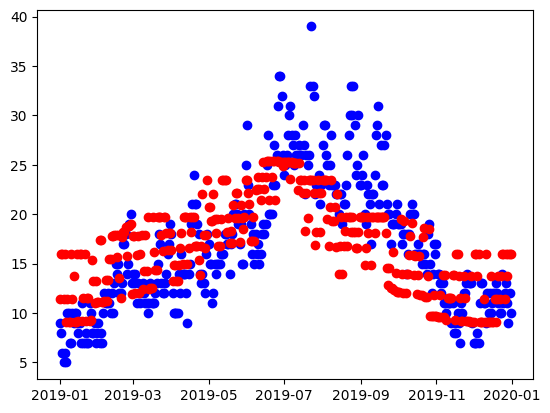

In [24]:
# Votre code ici :
import matplotlib.pyplot as plt


df_weather['DATE'] = pd.to_datetime(df_weather['DATE'])

plt.scatter(df_weather['DATE'], df_weather['MAX_TEMPERATURE_C'], color='blue')
plt.scatter(df_weather['DATE'], df_weather['predict'], color='red')

**Ca ne semble pas linéaire ! Et pourtant, ça l'est...**

# Prédictions sur une colonne plus corrélée
Refaites les mêmes étapes pour obtenir une nouvelle colonne "predict2". Votre objectif est de prédire "MAX_TEMPERATURE_C" à partir de la colonne "MIN_TEMPERATURE_C".

In [31]:
from sklearn.linear_model import LinearRegression

X = df_weather[['MIN_TEMPERATURE_C']]
y = df_weather['MAX_TEMPERATURE_C']
modelLR = LinearRegression().fit(X, y)
df_weather = df_weather.assign(predict2=lambda x: modelLR.predict(x[['MIN_TEMPERATURE_C']]))


## Scatterplot 1
- Axe X : Température minimale (MIN_TEMPERATURE_C)
- Axe Y : Température maximale (MAX_TEMPERATURE_C) en points bleus et 'predict2' en points rouges.

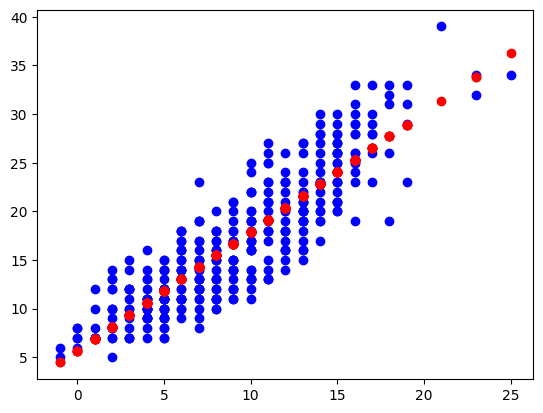

In [33]:
# Votre code ici :
import matplotlib.pyplot as plt

plt.scatter(df_weather['MIN_TEMPERATURE_C'], df_weather['MAX_TEMPERATURE_C'], color='blue')
plt.scatter(df_weather['MIN_TEMPERATURE_C'], df_weather['predict2'], color='red')

## Scatterplot 2
- Axe X : DATE
- Axe Y : Températures maximale (MAX_TEMPERATURE_C) en points bleus et 'predict2' en points rouges.

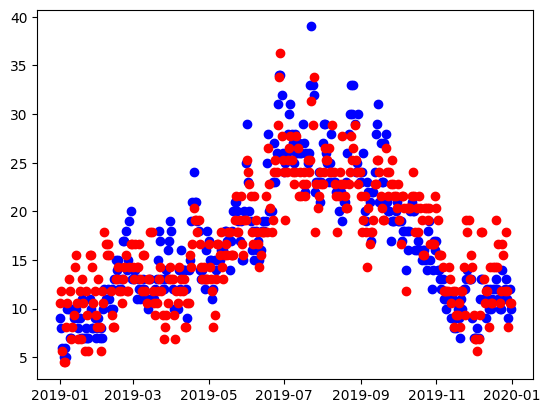

In [34]:
# Votre code ici :
import matplotlib.pyplot as plt

plt.scatter(df_weather['DATE'], df_weather['MAX_TEMPERATURE_C'], color='blue')
plt.scatter(df_weather['DATE'], df_weather['predict2'], color='red')